# La segmentation par seuillage - Partie 1

# 1 - Objectifs : Produire une séparation entre l'objet d'intèrêt et l'arrière plan de l'image



Ce cours aborde les méthodes manuelle et automatique pour éffectuer une segmentation d'image par seuillage. Nous y verrons également le rôle que jouent les espaces colorimétrique dans la segmentation d'image.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.morphology import area_opening 
from skimage.exposure import histogram
from skimage.filters import threshold_otsu 
from PIL import Image

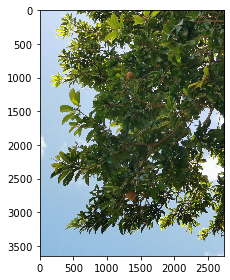

In [3]:
chico = imread('chico.jpg')
imshow(chico)

- Le but est de séparer l'objet (c'est à dire l'ensemble des feuilles) de l'arrière plan (le ciel)


- Pour cela, il nous faut définir le pixel seuil permettant la séparation 


- Dans le seuil optimal de binarisation, nous avions effectué plusieurs essais pour trouver trouver le seuil optimal de binarisation. Nous mettons en oeuvre cette procédure

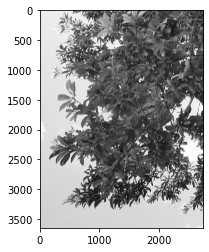

In [4]:
chico_gris = rgb2gray(chico)
plt.imshow(chico_gris,cmap='Greys_r')

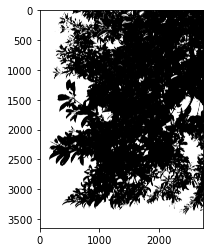

In [5]:
chico_gris = chico_gris > 0.6
plt.imshow(chico_gris,cmap='Greys_r')

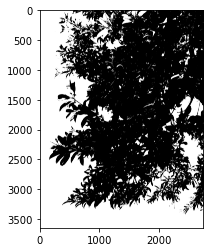

In [6]:
chico_gris = rgb2gray(chico)
chico_gris = chico_gris > 0.5
plt.imshow(chico_gris,cmap='Greys_r')

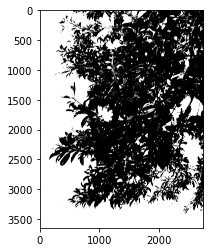

In [7]:
chico_gris = rgb2gray(chico)
chico_gris = chico_gris > 0.4
plt.imshow(chico_gris,cmap='Greys_r')

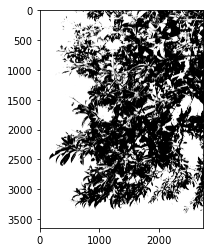

In [8]:
chico_gris = rgb2gray(chico)
chico_gris = chico_gris > 0.3
plt.imshow(chico_gris,cmap='Greys_r')

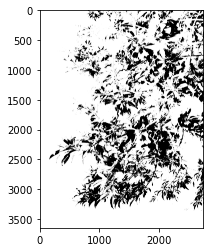

In [9]:
chico_gris = rgb2gray(chico)
chico_gris = chico_gris > 0.2
plt.imshow(chico_gris,cmap='Greys_r')

# 2 - 1 Rappel sur la méthode linspace de numpy


La méthode linspace (a,b,c) renvoir c nombres régulièrement espacés dans l'intervalle [a,c]

In [12]:
#Exemple
nombres = np.linspace(1,8,5)
nombres

array([1.  , 2.75, 4.5 , 6.25, 8.  ])

# 2 - 2 Méthodes d'identification du seuil optimal de segmentaion 

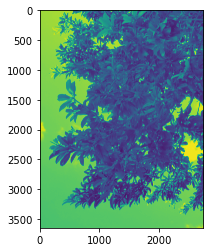

In [13]:
# Conversion en nuance de gris
chico_gris = rgb2gray(chico)
plt.imshow(chico_gris)

## 2 - 2 - 1  Méthode par visualisation

In [16]:
# Définition d'un ensemble de seuils test
seuils_test = np.linspace(0,1,13)
seuils_test

array([0.        , 0.08333333, 0.16666667, 0.25      , 0.33333333,
       0.41666667, 0.5       , 0.58333333, 0.66666667, 0.75      ,
       0.83333333, 0.91666667, 1.        ])

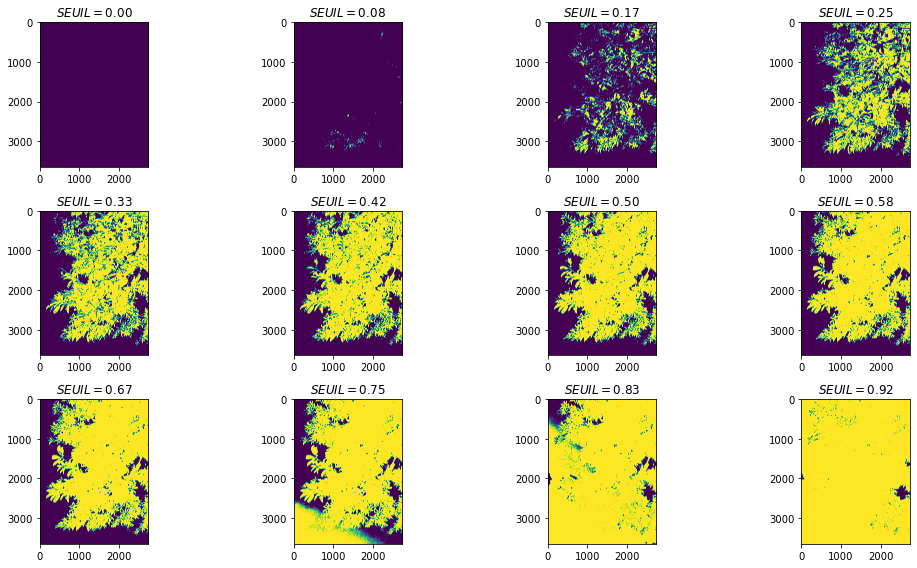

In [19]:
# visualisation de la binarisation en fonction de chaque seuil
seuils_test = np.linspace(0,1,13)

fig, axis = plt.subplots(3,4,figsize = (15,8))

for seuil, ax in zip (seuils_test, axis.flatten()): 
    
    chico_binaire = chico_gris < seuil 
    
    ax.imshow (chico_binaire)
    
    ax.set_title('$SEUIL = %.2f$' % seuil)
    
plt.tight_layout()

### Interpretation 

Nous pouvons constater que le seuil optimal se trouve dans l'intervakke [0.50, 0.67] car les seuils à cet intervalle produisent une bonne segmentation. Pour être plus précis, nous pouvons restreindre l'intervalle à [0.58, 0.67]

## 2 - 2 - 2 Méthode utilisant l'hisotgramme des pixels


Text(0, 0.5, 'Fréquence pixels')

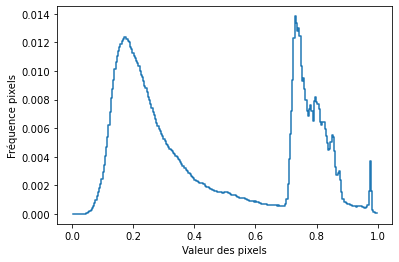

In [20]:
freq, bins = histogram (chico_gris)

plt.step(bins,(freq*1)/freq.sum())

plt.xlabel ('Valeur des pixels')

plt.ylabel ('Fréquence pixels')

Une population est normal lorsque tout les individus ont des caractéristique similaire dans la population

### Interpretation



- Sur l'histogramme nous obtenons deux courbes en cloches proche de la courbe de densité de la loi normal

- Rappelons qu'en probabilité, la loi normal ou loi de Ghauss caractérise une population homogène c'est à dire une population dont les individus présente des caractéristique semblable ou pas très différente les une des autres

- Ici, nous avons deux courbes proche de la loi normal représentant chacune les deux catégorie de pixel sur l'image : les pixels de l'arrière plan et les pixels des feuilles

- Il s'en suit que le seuil optimal se trouve à la frontière des deux courbes en cloches. Nous voyons qu'effectivement ce seuil se situe dans l'intervalle que nous a suggérer la méthode précédente : [0.50, 0.67] ou avec précison [0.58, 0.67]

### 2 - 2 - 3 Méthode d'otsu



La méthode d'otsu est utilisée pour effectuer un seuillage automatique. Son algorithme suppose que l'image à binariser ne contient que deux classe de pixels (le premier plan et l'arrière plan) puis calcule le seuil optimal qui sépare deux classes. 

In [21]:
seuil_otsu = threshold_otsu(chico_gris)
seuil_otsu

0.501953125

Text(0.5, 1.0, 'Segmentation d otsu ')

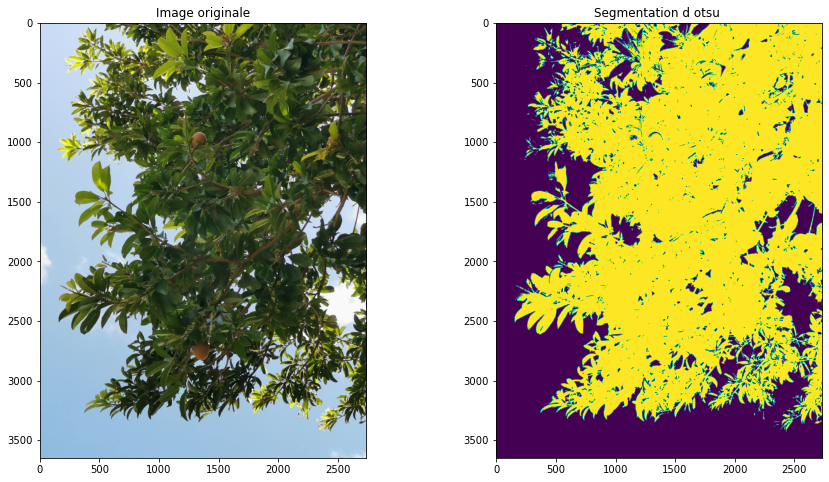

In [23]:
chico_binaire_otsu = chico_gris < seuil_otsu

fig,axis = plt.subplots(1,2,figsize = (15,8))

axis[0].imshow(chico)

axis[0].set_title('Image originale')

axis[1].imshow(chico_binaire_otsu)

axis[1].set_title('Segmentation d otsu ')

# Conclusion


- Nous remarquons que les 3 méthodes utilisé ne donne pas le même seuil mais les seuils qu'elles retournent se trouves dans les même fourchette


- EN data sciences, les méthodes n'aboutissent pas toutes à un résultat unanime mais à des résultats semblables, pas très différents les uns des autres. Ceci est normal car en data sciences on travaille avec des l'aléatoire (l'incertain). Ainsi, les diverses méthodes ne peuvent pas donner exactement le même résultat


- Toutefois, il est bien de combiner plusieurs méthodes car cela écarte le doute et nous permet de savoir que le résultat obtenu est plus ou moins aceptable 